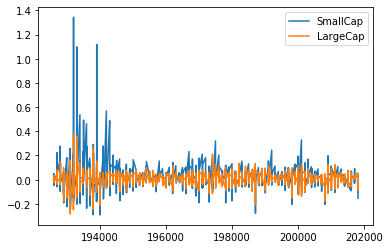

In [1]:
import pandas as pd
#import os 
#os.chdir('..')
me_m = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv",
                   header= 0, index_col=0,parse_dates=True,na_values= -99.99)
#Extract the returns of the low and high cap stock in terms of percentage
rets= me_m[['Lo 10','Hi 10']]
rets.columns = ["SmallCap","LargeCap"]
rets = rets/100
#Plot the returns to find the general trend of low and high market cap stocks
rets.plot.line()

### CLEANING THE DATA:
###### We need to clean up the data before computing the maximum drawdowns. We need to convert this into time series data, such that the data is not analyzed a time stamp, but in accordance to periods.

In [3]:
#Check the time period
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [4]:
#To convert this to a time series data, we would chnage it to the date-time data:
rets.index = pd.to_datetime(rets.index,format="%Y%m")
rets.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [5]:
#In order to convert it from the timestamp (1926-07-01) of a month to the period of a month:
rets.index=rets.index.to_period('M')
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [10]:
#Find the returns for all months in 1975.
rets["1975"]

,SmallCap,LargeCap
1975-01,0.3202,0.1286
1975-02,0.0657,0.0613
1975-03,0.0989,0.0414
1975-04,0.0288,0.0531
1975-05,0.0811,0.0610
1975-06,0.0779,0.0524
1975-07,0.0218,-0.0703
1975-08,-0.0525,-0.0177
1975-09,-0.0351,-0.0468
1975-10,-0.0009,0.0620


In [11]:
#Check the period again
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

## Compute the drawdowns
* Compute the wealth index
* Compute the previous peaks
* Compute the drawdown -which is the wealth value as a percentage change of the previous week.

## Methodology for  maximum drawdown computation

### Compute wealth index

In [12]:
#Wealth index would be computed with Initial Value * (1+r1)(1+r2)
#Assume that the initial wealth invested is 1000
wealth_index = 1000*(1+rets["LargeCap"]).cumprod()
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

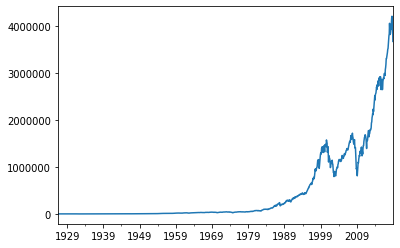

In [13]:
wealth_index.plot.line()

### Compute the previous peak

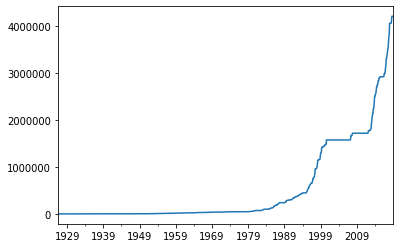

In [18]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot.line()

### Compute the maximum drawdown

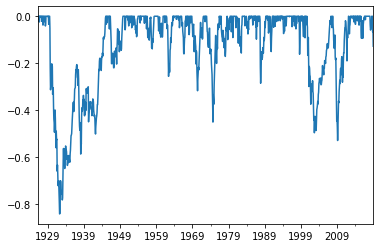

In [26]:
drawdown = (wealth_index-previous_peaks)/previous_peaks
drawdown.plot()

## Maximum Drawdown 

In [36]:
def drawdown(return_series: pd.Series): 
    
    """
    Take a time series of the asset returns
    Computes the returns a Dataframe that contains:
    the wealth index
    the previous peak
    percent drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index- previous_peaks)/ previous_peaks
    return pd.DataFrame({
        "Wealth" : wealth_index,
        "Peaks" : previous_peaks,
        "Drawdowns" : drawdowns
    })

## A. Compute the drawdown for the small cap stock

In [37]:
drawdown(rets["SmallCap"]).head()

,Wealth,Peaks,Drawdowns
1926-07,985.500000,985.500000,0.000000
1926-08,1035.957600,1035.957600,0.000000
1926-09,1045.592006,1045.592006,0.000000
1926-10,994.985353,1045.592006,-0.048400
1926-11,987.224467,1045.592006,-0.055822


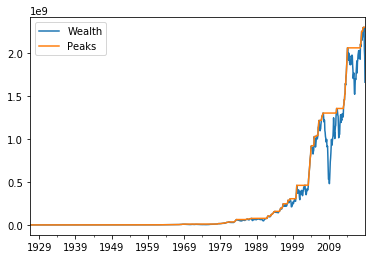

In [38]:
drawdown(rets["SmallCap"])[["Wealth","Peaks"]].plot()

###### We can observe that the occurances of peak and the fluctation in wealth index is not significant before 1975,so we would have a closer look at index after 1975

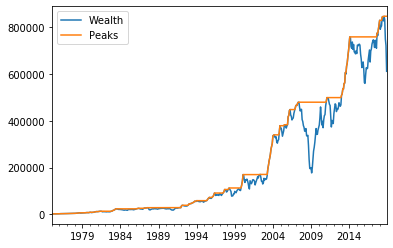

In [53]:
drawdown(rets["1975":]["SmallCap"])[["Wealth","Peaks"]].plot()

##### Maximum drawdown for small cap stocks:

In [58]:
drawdown(rets["SmallCap"])["Drawdowns"].min()

-0.8330007793945303

## B. Compute drawdown for the large cap stocks

In [50]:
drawdown(rets["LargeCap"]).head()

,Wealth,Peaks,Drawdowns
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


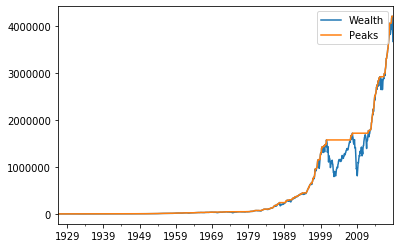

In [51]:
drawdown(rets["LargeCap"])[["Wealth","Peaks"]].plot()

In [57]:
#Compute the maximum drawndown for large cap stocks
drawdown(rets["LargeCap"])["Drawdowns"].min()

-0.8400375277943123

## C. Observing the divergence between performance of large cap and small cap stocks during  market crashes
### Test whether the maximum drawndown in the wealth index for large cap and small cap stock was triggered by the same event

In [23]:
#Test whether the percentage of drawdown was pretty uniform for large & small cap.
drawdown(rets["LargeCap"])["Drawdowns"].idxmin()

Period('1932-05', 'M')

In [24]:
drawdown(rets["SmallCap"])["Drawdowns"].idxmin()

Period('1932-05', 'M')

### Result:
#### As the period yielding the maximum drawdown in the wealth index is same for a portfolio holding large cap stocks and small cap stocks, we can assume that the trend of small and large cap stock are uniform during extreme market turbulence.

### Test whether the maximum drawndown in the wealth index for large cap and small cap stock was triggered by the same event after The Great Depression 

In [25]:
drawdown(rets["1940":]["SmallCap"])["Drawdowns"].idxmin()

Period('1974-12', 'M')

In [26]:
drawdown(rets["1940":]["LargeCap"])["Drawdowns"].idxmin()

Period('2009-02', 'M')

### Result:
#### The period yielding the maximum drawdown in the wealth index is not same for a portfolio holding large cap stocks and small cap stocks. The maximum drawndown in the portfolio of large cap stock was observed during the 1973–1974 stock market crash that came after the collapse of the Bretton Woods system. However, the maximum drawndown for the portfolio of small cap stocks was observed the during the subprime mortgage crisis.